In [1]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as mx

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # for Lasso and Elastic Net logistic regression
from sklearn.cross_decomposition import PLSRegression

# In this tutorial we will implement PLS, ridge, lasso and elastic net regression models

## Learning Outcomes: 
1) Implement PLS, ridge, and lasso and elastic-net using the popular python library sklearn https://scikit-learn.org/stable/
2) Visualise the regression results 
3) Explore different metrics to evaluate the model performance in regression settings
4) Investigate the effect of scaling the data on the model performance
5) Apply peanilised (ligistic) regression for classification 

## Data

In this tuorial we will use some plasma metabolomics data to predict BMI

In [2]:
df = pd.read_csv('/Data/diabetes_metabolomics_plasma.csv', index_col=0)

In [3]:
df.head() ### 

,AGE,GENDER,BMI,ETH,T2D,sample_id,"1,11-Undecanedicarboxylic acid","1,2-dipalmitoylglycerol","1,2-propanediol","1,3,7-trimethylurate",...,tyrosine,undecanoate (11:0),urate,urea,uridine,valine,xanthine,xylitol,xylonate,xylose
1,34.505133,0,25.010211,2,0,QMDiab-ID222,4.015998,4.822787,5.098491,4.430118,...,6.844272,4.885885,5.824023,7.577408,5.290736,7.239540,4.254777,4.052859,4.387091,4.676128
2,47.066393,1,28.367759,3,0,QMDiab-ID113,4.165116,4.991613,5.064084,4.585177,...,6.755005,4.777224,5.990350,7.465627,5.220019,7.348071,4.183861,4.341484,4.460427,4.585401
3,55.490760,1,29.705644,1,0,QMDiab-ID29,3.928917,4.965361,5.185007,4.006547,...,6.971284,4.737634,5.892525,7.433326,5.188568,7.356957,4.350213,4.101610,4.726884,4.785554
4,56.334018,1,23.140496,2,0,QMDiab-ID243,4.272476,4.819821,5.015473,4.564346,...,6.943175,4.736576,5.832160,7.422004,5.037060,7.260422,4.037787,4.111296,4.488342,4.696762
5,35.630390,1,30.062295,1,0,QMDiab-ID270,3.914247,4.900546,5.264884,3.719528,...,7.068370,4.754971,6.013982,7.786201,5.388167,7.377851,4.211793,4.099279,4.545646,4.630343


As you can see this data set in its current format is not suitable for our alogirthms. 
In python column indices start from 0, we want to subset only the metabolomics colulmns for feature scaling. 


In [4]:
# Create feature matrix and target vector
X = df.iloc[:,6:]
y = df['BMI']

In order to test our alogrithms we need to set aside some of the data we have. This is practice for machine learning models. We will use 80% of our data to train our model, and the remaining 20% will be used to test the performance of our model. 

Scikit-Learn has a function train_test_split to easily do this for us.

In [5]:
# Import train-test split
from sklearn.model_selection import train_test_split

# Split the df into 80% train 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42) #### if you want you can change the number '42 to your birthday and it will change the results slightly'

It is crucial that all of the data it is comparing is on the same scale. In our Proteaomics data, most of the data is continuous. We will scale the data using the StandardScaler() shown in the previous tutorials. 

When scaling your data you want to fit the model to your training data, and only transform your testing data. 

In [6]:
# Normalize Data
from sklearn.preprocessing import StandardScaler

# Instantiate scaler model
scaler = StandardScaler()

# Fit and Transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test
X_test_scaled = scaler.transform(X_test)

### PLS Regression 

In [7]:
pls2 = PLSRegression(n_components=1)
pls2.fit(X_train_scaled, y_train)
y_pred = pls2.predict(X_test_scaled)

#### Metrics
Today we will use the follwing metrics
- explained_variance_score
- r2_score
- mean_squared_error
- mean_absolute_error
- SMAPE

In [8]:
def smape(A, F):
    out =  100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
    return(out)

In [9]:
## Here we will defeine several helper functions to compute these metrics 
from sklearn import metrics
def RegmodelPerformance(y_true, y_pred):
    exp_var = metrics.explained_variance_score(y_true, y_pred)
    r_square = metrics.r2_score(y_true, y_pred)
    MSE = metrics.mean_squared_error(y_true, y_pred)
    MAE = metrics.mean_absolute_error(y_true, y_pred)
    SMAPE = smape(np.array(y_true), y_pred)
    return(exp_var, r_square, MSE, MAE, SMAPE)

def printPerformance(y_true, y_pred):
    exp_var, r_square, MSE, MAE, SMAPE = RegmodelPerformance(y_true, y_pred)
    print("explained variance score = " "%.4f" % exp_var)
    print("R2 = " "%.4f" % r_square)
    print("MSE = " "%.4f" % MSE)
    print("MAE = " "%.4f" % MAE)
    print("SMAPE = " "%.4f" % SMAPE)
    np.set_printoptions(precision=2)

In [10]:
printPerformance(y_test, y_pred)

explained variance score = 0.2400
R2 = 0.2394
MSE = 43.6940
MAE = 4.8778
SMAPE = 1376.5787


Whilst we have trained and fit a PLS model, we have not optimised the number of components. We also have not done 10-fold cross validation.

Text(0.5, 1.0, 'Cross-validation Metrics')

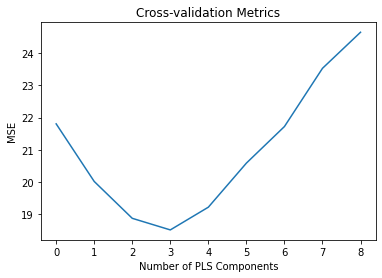

In [11]:
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from sklearn.preprocessing import scale 
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=123)

mse = []
n = len(X_train)



# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 10):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X_train), y_train, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('Cross-validation Metrics')


Alternatively, we can also run our own 10-fold CV without using any helper functions 

In [12]:
import random
#Generate 5 random numbers between 10 and 30
random.seed(42) ## can set this 
rand_list = random.sample(range(0, 100000), 10,)
print(rand_list)

[83810, 14592, 3278, 97196, 36048, 32098, 29256, 18289, 96530, 13434]


In [13]:
exp_vars = []
r_squares = []
MSEs = []
MAEs = []
SMAPEs = [] 
# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 10):
    exp_var_mean = 0 
    r_square_mean = 0
    MSE_mean = 0 
    MAE_mean = 0
    SMAPE_mean = 0 
    for f in rand_list:
        X_traincv, X_valcv, y_traincv, y_valcv = train_test_split(X_train, y_train, test_size= 0.20, random_state=f) #### if you want you can change the number '42 to your birthday and it will change the results slightly'
        X_traincv = scaler.fit_transform(X_traincv)
        X_valcv = scaler.fit_transform(X_valcv)
        pls = PLSRegression(n_components=i)
        pls.fit(X_traincv, y_traincv)
        ypred = pls.predict(X_valcv)
        exp_var, r_square, MSE, MAE, SMAPE = RegmodelPerformance(y_valcv, ypred)
        exp_var_mean+= exp_var
        r_square_mean += r_square
        MSE_mean += MSE
        MAE_mean += MAE
        SMAPE_mean += SMAPE
    exp_vars.append(exp_var_mean/10)
    r_squares.append(r_square_mean/10)
    MSEs.append(MSE_mean/10)
    MAEs.append(MAE_mean/10)
    SMAPEs.append(SMAPE_mean/10)

Text(0.5, 1.0, 'Cross-validation Metrics')

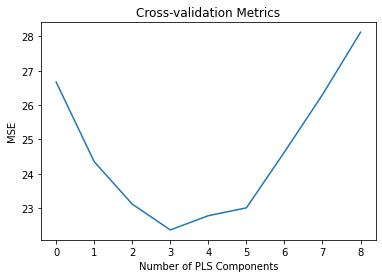

In [14]:
#plot test MSE vs. number of components
plt.plot(MSEs)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('Cross-validation Metrics')


Results vary slightly depending on the split seed values, although it looks like the best model is the one with 3 components

In [15]:
pls2 = PLSRegression(n_components=3)
pls2.fit(X_train_scaled, y_train)
y_pred = pls2.predict(X_test_scaled)
printPerformance(y_test, y_pred)

explained variance score = 0.3870
R2 = 0.3868
MSE = 35.2285
MAE = 4.3849
SMAPE = 1487.2234


## LASSO 

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [17]:
# define model
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_scaled, y_train)
# summarize
print('MAE: %.3f' % (results.best_score_*-1))
print('Config: %s' % results.best_params_)

MAE: 3.451
Config: {'alpha': 0.21}


In [18]:
y_pred = search.predict(X_test_scaled)
printPerformance(y_test, y_pred)

explained variance score = 0.4342
R2 = 0.4323
MSE = 32.6151
MAE = 4.1820
SMAPE = 13.3193


### Ridge 

Try right the above but using the Ridge() function. Click the three dots in the cell below will expand to show the result

In [19]:
# define model and try the rest yourself
model = Ridge()

In [20]:
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_scaled, y_train)
# summarize
print('MAE: %.3f' % (results.best_score_*-1))
print('Config: %s' % results.best_params_)

MAE: 5.529
Config: {'alpha': 0.99}


In [21]:
# test set performane 
y_pred = search.predict(X_test_scaled)
printPerformance(y_test, y_pred)

explained variance score = -0.1208
R2 = -0.1237
MSE = 64.5581
MAE = 5.9639
SMAPE = 19.6624


### Elastic-Net 

Elastic Net is a mix of both ridge and lasso, where we can tune both of the parameters

In [22]:
# define model
model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
# define grid
grid = dict()
grid = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_scaled, y_train)
# summarize
print('MAE: %.3f' % (results.best_score_*-1))
print('Config: %s' % results.best_params_)

MAE: 3.317
Config: {'alpha': 1, 'l1_ratio': 0.0, 'max_iter': 5}


/home/kl2418/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.820e+03, tolerance: 8.574e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [23]:
# test set performane 
y_pred = search.predict(X_test_scaled)
printPerformance(y_test, y_pred)

explained variance score = 0.3809
R2 = 0.3809
MSE = 35.5656
MAE = 4.3748
SMAPE = 13.9385


### What's Next?
We have walked through how to implement PLS, Ridge, LASO, Elastic_Net regressioj
For further understanding and practice:
- Try using a different scaling for instance: robust_scale / RobustScaler, power_transform / PowerTransformer
- Change certain paramaters like number of folds, ncomponents (PLS), alpha and lambda values
- Use a different dataset for a regression problem
- Implement different error metrics for regression
- Implement the classification versions of these
